Homework **#3** for course **Machine Learning for Data Analysis**
## Running a Lasso Regression Analysis

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None
%matplotlib inline 

### Import and estimate data

In [6]:
data = pd.read_csv("addhealth.csv")
data_clean = data.dropna()
data_clean.dtypes
data_clean.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,age,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,...,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000,4575.000000
mean,1.521093,0.111038,0.683279,0.236066,0.036284,0.040437,16.493052,0.176393,0.527432,0.369180,...,40.952131,1.618579,0.102514,2.645027,28.360656,2.815647,0.040219,22.570557,6.290710,13.398033
std,0.499609,0.314214,0.465249,0.424709,0.187017,0.197004,1.552174,0.381196,0.499302,0.894947,...,5.381439,2.593230,0.303356,3.520554,5.156385,0.770167,0.196493,2.614754,3.360219,2.085837
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,18.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,6.300000,0.000000,3.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.254795,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.700000,4.000000,12.000000
50%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.509589,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,1.000000,29.000000,2.750000,0.000000,23.700000,6.000000,14.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.679452,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,9.000000,15.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.512329,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


### Data preproccessing

In [13]:
variables = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
                        'ALCEVR1','ALCPROBS1','DEP1','ESTEEM1','VIOL1','PASSIST','DEVIANT1',
                        'SCHCONN1','EXPEL1','FAMCONCT','PARACTV']]

target = data_clean.GPA1

In [14]:
recode = {1:1, 2:0}
data_clean['BIO_SEX'] = data_clean['BIO_SEX'].map(recode)

In [16]:
predictors = variables.copy()

In [23]:
predictors['BIO_SEX'] = preprocessing.scale(predictors['BIO_SEX'].astype('float64'))
predictors['HISPANIC'] = preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE'] = preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN'] = preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN'] = preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['ALCEVR1'] = preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['DEP1']=preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['ESTEEM1']=preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['SCHCONN1']=preprocessing.scale(predictors['SCHCONN1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=.3)

### Fitting LassoLarsCV

In [27]:
Lasso_reg = LassoLarsCV(cv=10, precompute=False).fit(X_train, y_train)

In [29]:
dict(zip(predictors.columns, Lasso_reg.coef_))

{'ALCEVR1': -0.065569279711631873,
 'ALCPROBS1': 0.0,
 'ASIAN': 0.020008367460522432,
 'BIO_SEX': 0.10512914853316829,
 'BLACK': -0.17835941791199483,
 'DEP1': -0.017284922598956323,
 'DEVIANT1': -0.035193581210535348,
 'ESTEEM1': 0.041557525561455352,
 'EXPEL1': -0.021849839939429561,
 'FAMCONCT': 0.0,
 'HISPANIC': -0.054200643527444615,
 'NAMERICAN': -0.025961662548647683,
 'PARACTV': 0.092746416290536857,
 'PASSIST': -0.056870116422721731,
 'SCHCONN1': 0.12292457087951193,
 'VIOL1': -0.071415615554362141,
 'WHITE': 0.0047649946335321016}

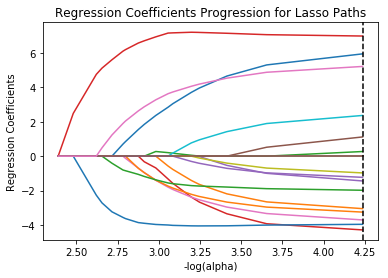

In [30]:
m_log_alphas = -np.log10(Lasso_reg.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, Lasso_reg.coef_path_.T)
plt.axvline(-np.log10(Lasso_reg.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

### MSE plot

/Users/elisavetakarpova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


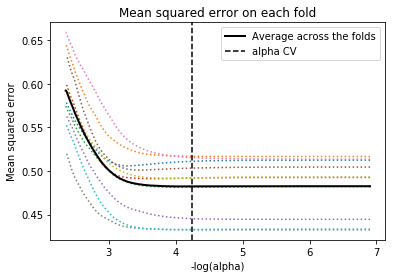

In [31]:
m_log_alphascv = -np.log10(Lasso_reg.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, Lasso_reg.mse_path_, ':')
plt.plot(m_log_alphascv, Lasso_reg.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(Lasso_reg.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

### MSE train and test data

In [34]:
train_error = mean_squared_error(y_train, Lasso_reg.predict(X_train))
test_error = mean_squared_error(y_test, Lasso_reg.predict(X_test))
print('training data MSE', train_error)
print('test data MSE', test_error)

training data MSE 0.476070614852
test data MSE 0.481367970641


### R-square train and test data

In [35]:
rsquared_train = Lasso_reg.score(X_train, y_train)
rsquared_test = Lasso_reg.score(X_test, y_test)
print('training data R-square', rsquared_train)
print('test data R-square', rsquared_test)

training data R-square 0.196046323365
test data R-square 0.190654233356
